# Charuco generation & processing

In [5]:
# imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# helper funciton to quickly show an image
def imshow(img, scale=1):
    (h, w) = img.shape[0:2]
    aspect = w/h
    default_w = 6.4 #inches
    w2 = scale*default_w
    h2 = scale*default_w/aspect
    figsize = (w2, h2)
    f = plt.figure(figsize=figsize)
    
    if len(img.shape) > 2:
        img_bgr = img
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
    elif np.min(img) == 0 and np.max(img) == 1:
        #binary image
        img_binary = img
        plt.imshow(img_binary, cmap='gray', vmin=0, vmax=1)
    else: 
        #grayscale image
        img_gray = img
        plt.imshow(img_gray, cmap='gray',  vmin=0, vmax=255)

def imshow_cv2(img, timeout=5000):
    cv2.imshow('img', img)
    cv2.waitKey(timeout)
    cv2.destroyAllWindows()
    cv2.waitKey(1)

BUF SHAPE: (132, 60)


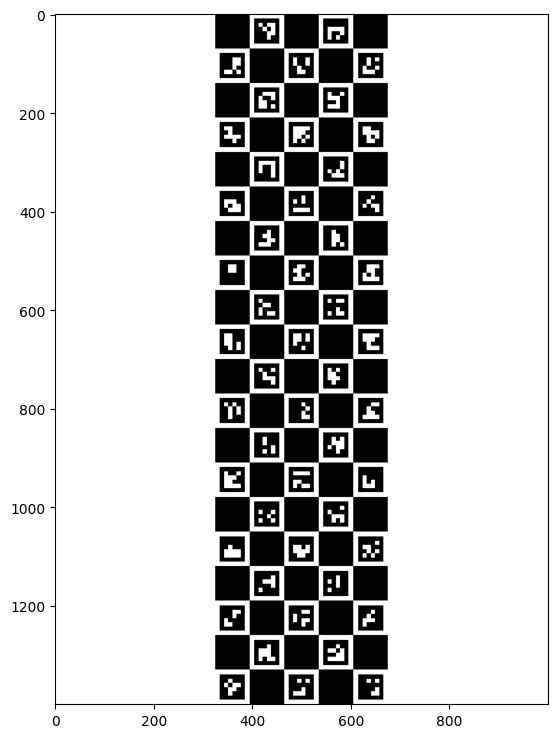

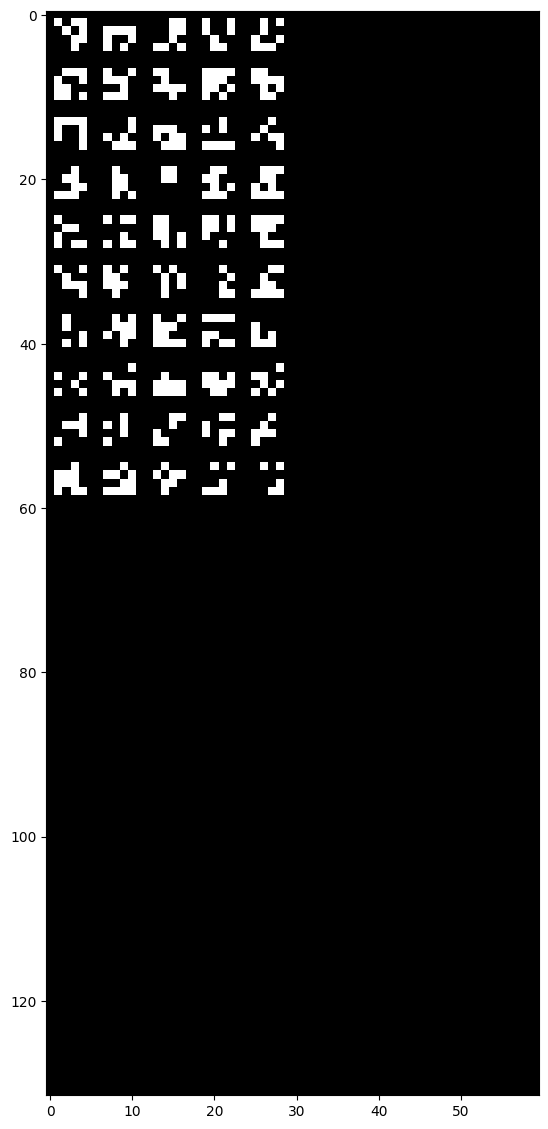

In [6]:
# generate charuco board

aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_50)
board = cv2.aruco.CharucoBoard((5, 20 ), 0.015, 0.011, aruco_dict)
charuco_img = board.generateImage((1000, 1400))
imshow(charuco_img) 

# WRITE IMAGE?
# cv2.imwrite("charuco_img.png", charuco_img)

rows = 11
cols = 5

test_idx = 48
marker_size = 6

# manually plot charuco board
buf = np.zeros( (rows*2*marker_size, cols*2*marker_size), dtype=np.uint8)
print("BUF SHAPE:", buf.shape)
marker_imgs = []
for i in range(50):
# for i in range(test_idx, test_idx+1):
    x = i // cols
    y = i % cols
    # print(f"i={i}, row#={x}, col#={y}")
    marker_img = aruco_dict.generateImageMarker(id=i, sidePixels=marker_size)
    marker_imgs.append(marker_img)
    # print("MARKER SHAPE:", marker_img.shape)
    # print(f"TARGET RECT: x={x * marker_size}:{(x+1)*marker_size}, y={y*marker_size}:{(y+1)*marker_size}")
    buf[x * marker_size: (x+1)*marker_size, y*marker_size:(y+1)*marker_size] = marker_img

imshow(buf)